
# Performing Stationary test with data drawn from Fugle RestAPI of CHT 2018-2020

In [1]:
from fugle_marketdata import RestClient

client = RestClient(api_key = 'ODFjMGIwMTItNGVhOC00ZDE3LWIzNGMtODQ2YWQxODQ3NDU3IGRjMGJiZDJiLWM0ZDAtNGI2NC04MmU2LTEzOTViZTVhOTM0Yg==')
stock = client.stock

# Import Data from RestAPI
y18 = stock.historical.candles(**{"symbol": "2412",
                                  "from": "2018-01-01",
                                  "to": "2018-12-31",
                                  "fields": "close",
                                  'sort': 'asc'})
y19 = stock.historical.candles(**{"symbol": "2412",
                                  "from": "2019-01-01",
                                  "to": "2019-12-31",
                                  "fields": "close",
                                  'sort': 'asc'})
y20 = stock.historical.candles(**{"symbol": "2412",
                                  "from": "2020-01-01",
                                  "to": "2020-12-31",
                                  "fields": "close",
                                  'sort': 'asc'})


Data drawn from Fugle is in the form of dictionaries. Transform these dictionaries into the form of dataframes.

In [2]:
# Consolidating Data
import pandas as pd
df18 = pd.DataFrame.from_dict(y18['data'])
df19 = pd.DataFrame.from_dict(y19['data'])
df20 = pd.DataFrame.from_dict(y20['data'])

df18_20 = pd.concat([df18, df19, df20], ignore_index=True)


Now we have a complete set of closing prices of CHT from start of 2018 to end of 2020

The prices are plotted below:

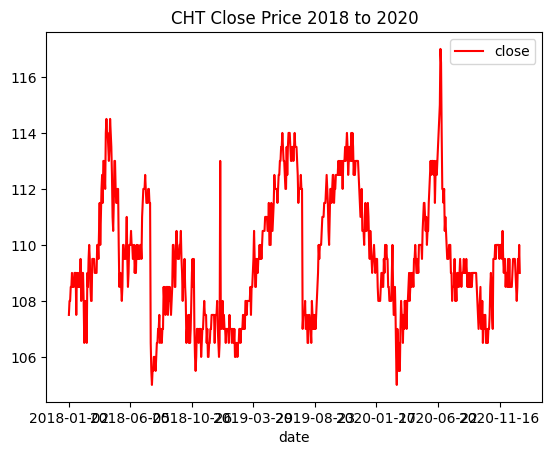

In [3]:
# Plot Closing Prices
import matplotlib.pyplot as plt
df18_20.plot(kind = 'line',
             x = 'date',
             y = 'close',
             color = 'red')
plt.title('CHT Close Price 2018 to 2020')
plt.show()


## ADF test for stationarity

In [4]:
prices = df18_20['close'].to_list()

# Perform ADF test
from statsmodels.tsa.stattools import adfuller
adfuller(prices)

(-3.346606492705209,
 0.012919430208894656,
 3,
 730,
 {'1%': -3.4393396487377155,
  '5%': -2.865507363200066,
  '10%': -2.5688826684180897},
 1641.4849294886808)


Null hypothesis can be rejected at the 95% confidence interval. The process can be considered stationary.

## Hurst exponent

In [5]:
# Compute Hurst Exponent
from hurst import compute_Hc
H, c, data = compute_Hc(prices, kind='price', simplified=True)
print("H={:.4f}, c={:.4f}".format(H,c))

H=0.3682, c=1.5651



A hurst exponent (H) less than 0.5 indicates a stationary time series. We have aligning results from both tests.